In [46]:
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('medical.csv')
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [2]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df = df.drop(['AppointmentID', 'PatientId'], axis=1)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
from sklearn.preprocessing import LabelEncoder

df.Gender = LabelEncoder().fit_transform(df.Gender)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df['No-show'] = LabelEncoder().fit_transform(df['No-show'])
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [6]:
len(df.Neighbourhood.unique())

81

In [7]:
len(df.Neighbourhood.unique()) / len(df)

0.0007328526061505334

In [8]:
df['Neighbourhood'] = LabelEncoder().fit_transform(df['Neighbourhood'])
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0
1,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0
2,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0
3,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0
4,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0


In [9]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x:x.date())
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] =pd.to_datetime(df['AppointmentDay'])
df['Delta'] = df['AppointmentDay'] - df['ScheduledDay']
df['Delta'] = df['Delta'].apply(lambda x: x.days)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Delta
0,0,2016-04-29,2016-04-29,62,39,0,1,0,0,0,0,0,0
1,1,2016-04-29,2016-04-29,56,39,0,0,0,0,0,0,0,0
2,0,2016-04-29,2016-04-29,62,45,0,0,0,0,0,0,0,0
3,0,2016-04-29,2016-04-29,8,54,0,0,0,0,0,0,0,0
4,0,2016-04-29,2016-04-29,56,39,0,1,1,0,0,0,0,0


In [10]:
df['a_weekday'] = df['AppointmentDay'].apply(lambda x: x.weekday())
df['s_weekday'] = df['ScheduledDay'].apply(lambda x: x.weekday())
df.head()
df.tail()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Delta,a_weekday,s_weekday
110522,0,2016-05-03,2016-06-07,56,43,0,0,0,0,0,1,0,35,1,1
110523,0,2016-05-03,2016-06-07,51,43,0,0,0,0,0,1,0,35,1,1
110524,0,2016-04-27,2016-06-07,21,43,0,0,0,0,0,1,0,41,1,2
110525,0,2016-04-27,2016-06-07,38,43,0,0,0,0,0,1,0,41,1,2
110526,0,2016-04-27,2016-06-07,54,43,0,0,0,0,0,1,0,41,1,2


In [11]:
df = df.drop(['ScheduledDay', 'AppointmentDay'], axis=1)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Delta,a_weekday,s_weekday
0,0,62,39,0,1,0,0,0,0,0,0,4,4
1,1,56,39,0,0,0,0,0,0,0,0,4,4
2,0,62,45,0,0,0,0,0,0,0,0,4,4
3,0,8,54,0,0,0,0,0,0,0,0,4,4
4,0,56,39,0,1,1,0,0,0,0,0,4,4


In [12]:
df[df.Delta < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Delta,a_weekday,s_weekday
27033,1,38,59,0,0,0,0,1,0,1,-1,0,1
55226,0,19,69,0,0,0,0,1,0,1,-1,1,2
64175,0,22,13,0,0,0,0,0,0,1,-1,2,3
71533,0,81,69,0,0,0,0,0,0,1,-6,3,2
72362,1,7,78,0,0,0,0,0,0,1,-1,1,2


In [13]:
df = df[df.Delta >= 0]
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Delta,a_weekday,s_weekday
0,0,62,39,0,1,0,0,0,0,0,0,4,4
1,1,56,39,0,0,0,0,0,0,0,0,4,4
2,0,62,45,0,0,0,0,0,0,0,0,4,4
3,0,8,54,0,0,0,0,0,0,0,0,4,4
4,0,56,39,0,1,1,0,0,0,0,0,4,4


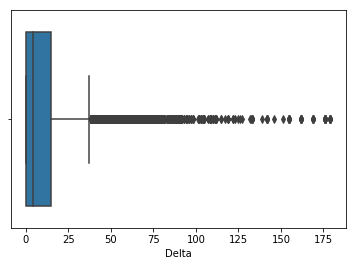

In [14]:
import seaborn as sns
sns.boxplot(df.Delta)

In [15]:
len(df[df.Delta > 37])
len(df[df.Delta < 37])

104388

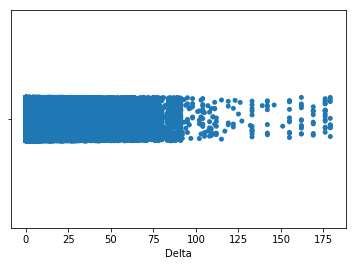

In [16]:
sns.stripplot(df.Delta, jitter=True)

In [49]:
df.sample(frac=1)

data = df.drop(['No-show'], axis=1)
target = df['No-show']

# data = StandardScaler().fit_transform(data)

sc = SVC(kernel='linear', verbose=True)
# sc = SVC(kernel='rbf', verbose=True)

def get_accuracy(cl):
    dtr, dts, ttr, tts = train_test_split(data[:10000], target[:10000])
    cl.fit(dtr, ttr)
    return accuracy_score(tts, cl.predict(dts))

get_accuracy(sc)

ValueError: could not convert string to float: 'MARIA ORTIZ'